In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fantasy-football/master_team_list.csv
/kaggle/input/fantasy-football/cleaned_merged_seasons.csv


In [56]:
!ls /kaggle/input/fantasy-football



cleaned_merged_seasons.csv  master_team_list.csv


In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import Precision, Recall
import missingno as msno
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv('/kaggle/input/fantasy-football/cleaned_merged_seasons.csv')
df.head(12501)


/tmp/ipykernel_37/268167053.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/fantasy-football/cleaned_merged_seasons.csv')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,Spurs,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,Liverpool,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,2017-18,Matt Phillips,MID,NaN,0,0,16,1,37.8,432,210,0,0,5.6,17.2,2017-12-31T16:30:00Z,71,1,Arsenal,0,0,0,0,21,0,22647,1.0,1.0,1.0,3,-528,111,639,55,True,0,21
12497,2017-18,Matt Ritchie,MID,NaN,0,0,9,1,16.0,295,207,0,0,2.4,6.2,2017-12-30T15:00:00Z,71,3,Brighton,0,0,0,0,21,0,125767,0.0,0.0,2.0,3,-6484,4478,10962,55,True,0,21
12498,2017-18,Matt Targett,DEF,NaN,0,0,0,0,0.0,309,206,0,0,0.0,0.0,2017-12-30T17:30:00Z,0,12,Man Utd,0,0,0,0,21,0,3512,0.0,0.0,0.0,0,-3,117,120,43,False,0,21
12499,2017-18,Mesut Özil,MID,NaN,0,0,0,0,0.0,16,210,0,0,0.0,0.0,2017-12-31T16:30:00Z,0,19,West Brom,0,0,0,0,21,0,161422,1.0,1.0,0.0,0,4494,18311,13817,93,False,0,21


In [59]:
print(df.columns)           # Shows column names as an Index
print(df.columns.tolist())  # Shows them as a clean Python list

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')
['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_i

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [61]:
df.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,7.146263,32.466117,10.505496,0.001633,0.001029,0.000717,0.001716,20.772099,0.101894,2.021442e+05,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,12.873136,40.574888,5.764941,0.040629,0.032069,0.026776,0.041386,10.941742,0.650732,5.362493e+05,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,5.457000e+03,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,2.763900e+04,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,10.600000,90.000000,16.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.456790e+05,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,163.600000,90.000000,20.000000,2.000000,1.000000,1.000000,1.000000,38.000000,14.000000,9.582624e+06,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


<Axes: >

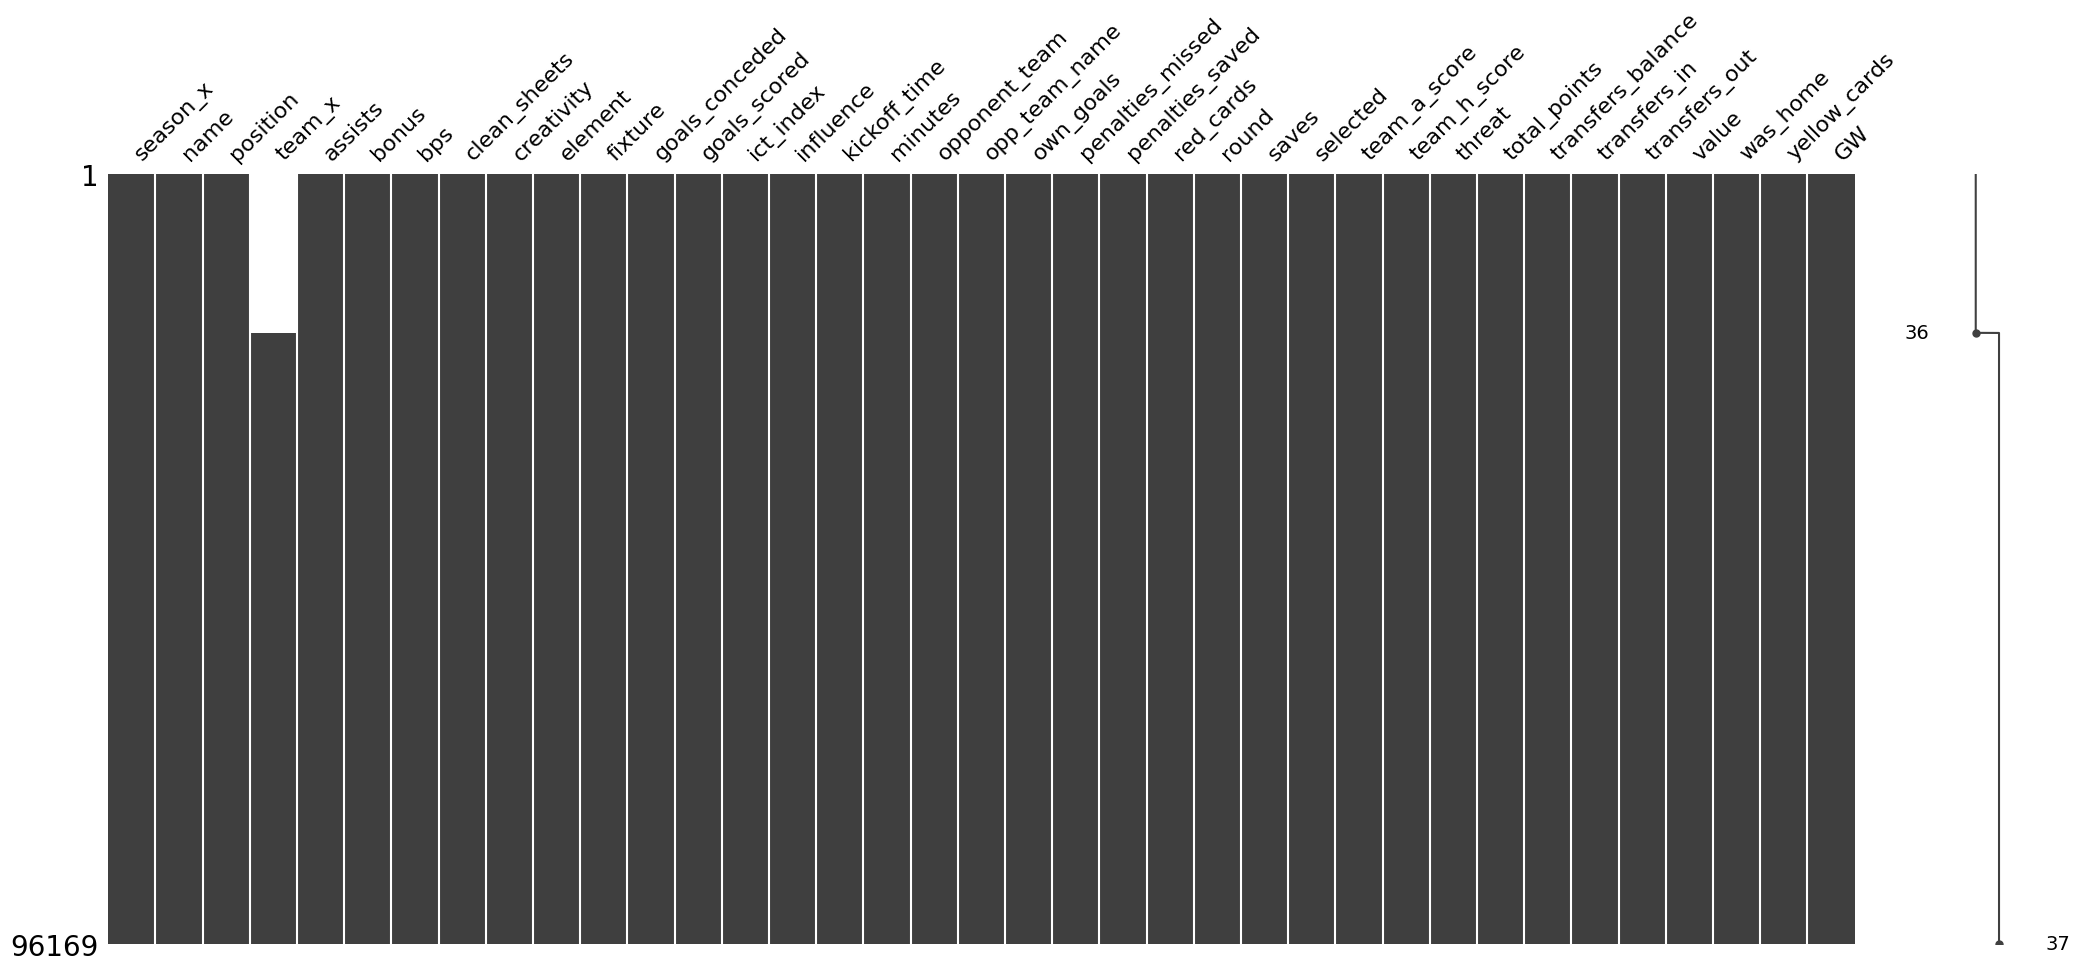

In [62]:
msno.matrix(df)

In [63]:
df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

In [64]:
#set the maximum number of columns to be shown
pd.set_option('display.max_columns', 100)
#set the maximum number of rows to be shown
pd.set_option('display.max_rows', 200)

In [65]:
# Fill NaNs in "team_x" within each "name" group using nearest non-null values:
# - Forward fill (ffill) to use the previous value
# - Backward fill (bfill) for any remaining NaNs

#df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
df["team_x"] = df.groupby("name")["team_x"].transform(lambda x:x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_37/883475892.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["team_x"] = df.groupby("name")["team_x"].transform(lambda x:x.fillna(method="ffill").fillna(method="bfill"))


<Axes: >

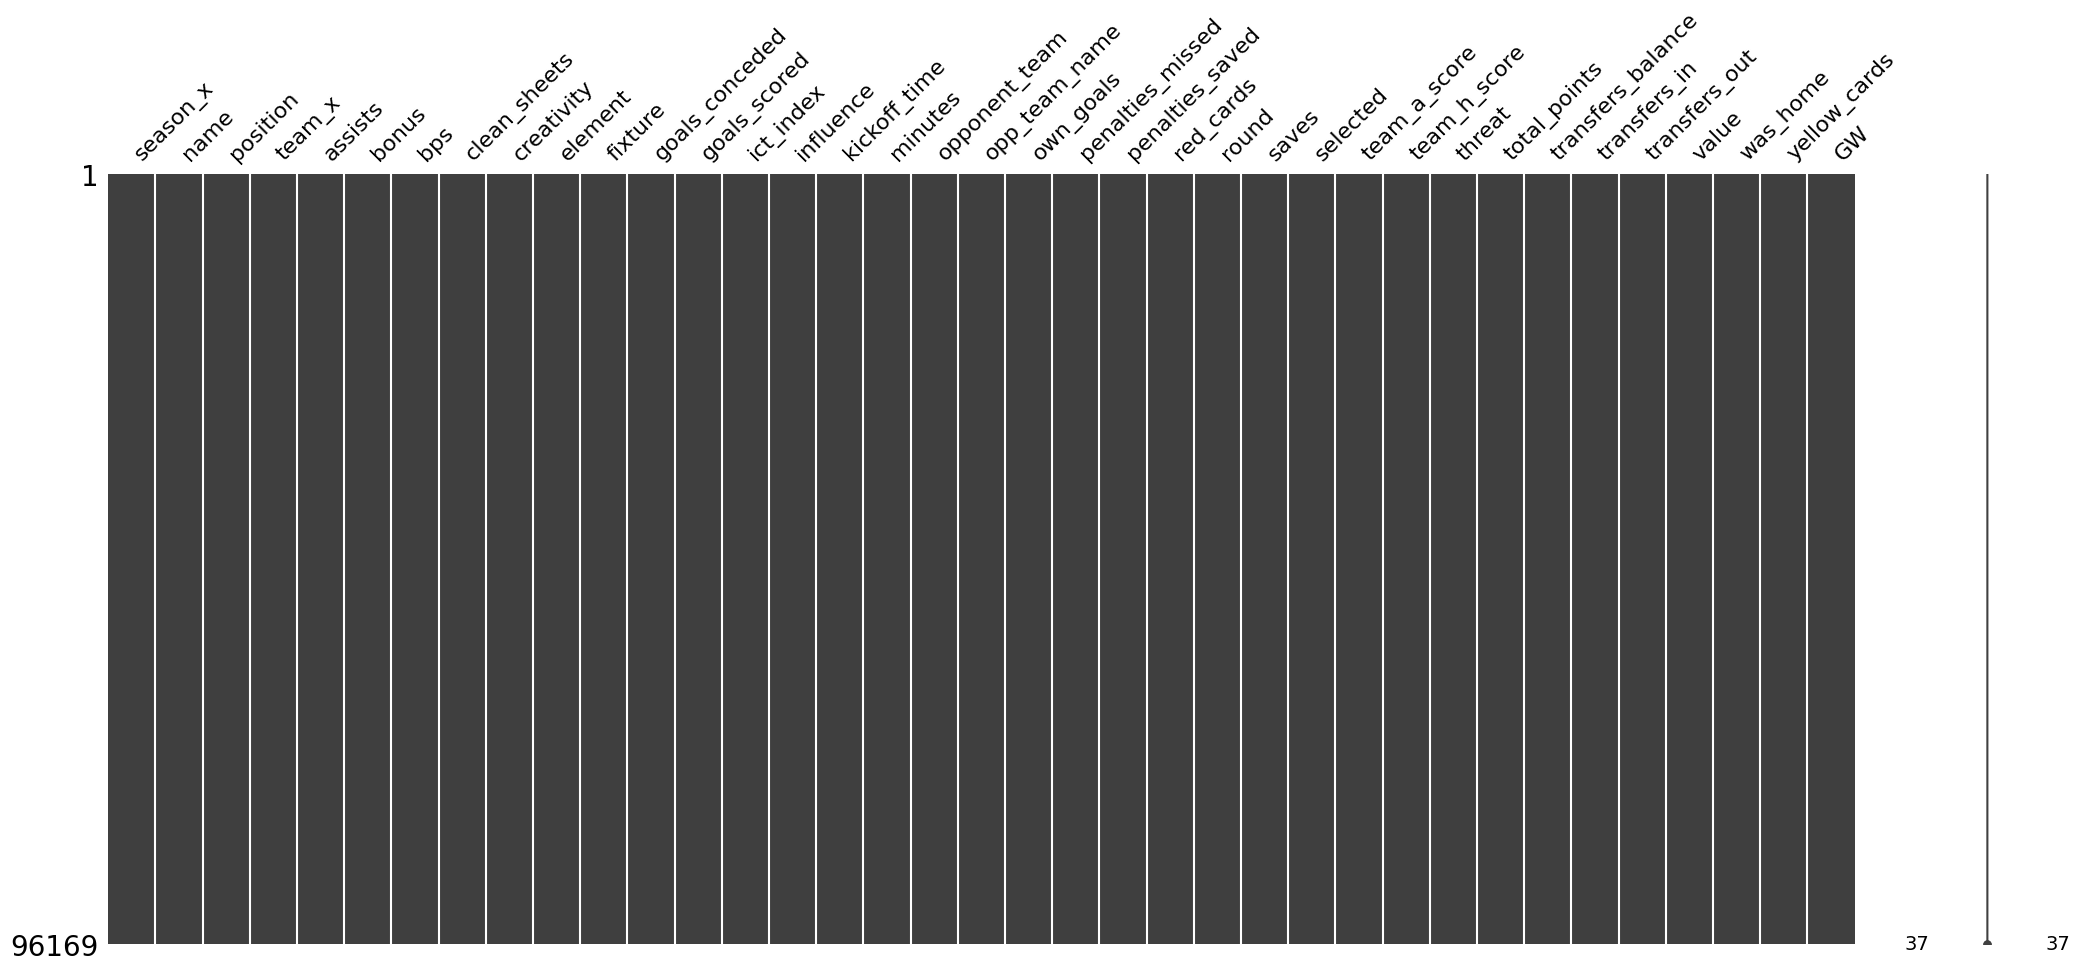

In [66]:
msno.matrix(df)

In [67]:
df.head()


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,Burnley,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,Spurs,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,Aston Villa,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,Liverpool,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,Everton,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,Leeds,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1


In [68]:
df.duplicated().sum()
df.duplicated(keep=False)
#df[df.dublicated()]

0        False
1        False
2        False
3        False
4        False
         ...  
96164    False
96165    False
96166    False
96167    False
96168    False
Length: 96169, dtype: bool

In [69]:
dupe_groups = (
    df.groupby(["name", "season_x", "GW"])
    .size()
    .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"]>1]
print(dupe_groups)

                  name season_x  GW  count
57      Aaron Connolly  2021-22  22      2
59      Aaron Connolly  2021-22  25      2
63      Aaron Connolly  2021-22  29      2
66      Aaron Connolly  2021-22  33      2
130    Aaron Cresswell  2017-18  22      2
...                ...      ...  ..    ...
90181   Çaglar Söyüncü  2021-22  37      2
90210   Çaglar Söyüncü  2022-23  29      2
90235     Ørjan Nyland  2020-21  19      2
90242     Ørjan Nyland  2020-21  26      2
90251     Ørjan Nyland  2020-21  35      2

[5860 rows x 4 columns]


In [70]:
print(dupe_groups)

                  name season_x  GW  count
57      Aaron Connolly  2021-22  22      2
59      Aaron Connolly  2021-22  25      2
63      Aaron Connolly  2021-22  29      2
66      Aaron Connolly  2021-22  33      2
130    Aaron Cresswell  2017-18  22      2
...                ...      ...  ..    ...
90181   Çaglar Söyüncü  2021-22  37      2
90210   Çaglar Söyüncü  2022-23  29      2
90235     Ørjan Nyland  2020-21  19      2
90242     Ørjan Nyland  2020-21  26      2
90251     Ørjan Nyland  2020-21  35      2

[5860 rows x 4 columns]


In [71]:
dupe_groups.head(50)


,name,season_x,GW,count
57,Aaron Connolly,2021-22,22,2
59,Aaron Connolly,2021-22,25,2
63,Aaron Connolly,2021-22,29,2
66,Aaron Connolly,2021-22,33,2
130,Aaron Cresswell,2017-18,22,2
144,Aaron Cresswell,2017-18,37,2
163,Aaron Cresswell,2020-21,19,2
202,Aaron Cresswell,2021-22,21,2
246,Aaron Cresswell,2022-23,29,2
251,Aaron Cresswell,2022-23,34,2


In [72]:
# 1️⃣ Sort by player, season, and gameweek
df = df.sort_values(by=["name", "season_x", "GW"]).reset_index(drop=True)
# df.head(100)
# 2️⃣ Now shift total_points correctly
df["upcoming_total_points"] = (
    df.groupby(["name", "season_x"])["total_points"].shift(-1)
)

df.isnull().sum()

season_x                    0
name                        0
position                    0
team_x                      0
assists                     0
bonus                       0
bps                         0
clean_sheets                0
creativity                  0
element                     0
fixture                     0
goals_conceded              0
goals_scored                0
ict_index                   0
influence                   0
kickoff_time                0
minutes                     0
opponent_team               0
opp_team_name               0
own_goals                   0
penalties_missed            0
penalties_saved             0
red_cards                   0
round                       0
saves                       0
selected                    0
team_a_score                0
team_h_score                0
threat                      0
total_points                0
transfers_balance           0
transfers_in                0
transfers_out               0
value     

In [73]:
# 1️⃣ Ensure the dataframe is sorted properly
df = df.sort_values(by=['season_x', 'name', 'GW']).reset_index(drop=True)

# 2️⃣ Duplicate dataframe to preserve the original
df_copy = df.copy()


In [74]:
print(df_copy)

      season_x             name position     team_x  assists  bonus  bps  \
0      2016-17  Aaron Cresswell      DEF   West Ham        0      0    0   
1      2016-17  Aaron Cresswell      DEF   West Ham        0      0    0   
2      2016-17  Aaron Cresswell      DEF   West Ham        0      0    0   
3      2016-17  Aaron Cresswell      DEF   West Ham        0      0    0   
4      2016-17  Aaron Cresswell      DEF   West Ham        0      0    0   
...        ...              ...      ...        ...      ...    ...  ...   
96164  2022-23   Çaglar Söyüncü      DEF  Leicester        0      3   30   
96165  2022-23   Çaglar Söyüncü      DEF  Leicester        0      0   12   
96166  2022-23   Çaglar Söyüncü      DEF  Leicester        0      0    0   
96167  2022-23   Çaglar Söyüncü      DEF  Leicester        0      0    0   
96168  2022-23   Çaglar Söyüncü      DEF  Leicester        0      0    0   

       clean_sheets  creativity  element  fixture  goals_conceded  \
0                 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [75]:
df.head(    )

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,upcoming_total_points
0,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1,0.0
1,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,20,0,0,0.0,0.0,2016-08-21T15:00:00Z,0,2,Bournemouth,0,0,0,0,2,0,11531,0.0,1.0,0.0,0,-3002,79,3081,55,True,0,2,0.0
2,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,29,0,0,0.0,0.0,2016-08-28T15:00:00Z,0,10,Man City,0,0,0,0,3,0,9587,1.0,3.0,0.0,0,-2053,28,2081,54,False,0,3,0.0
3,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,38,0,0,0.0,0.0,2016-09-10T14:00:00Z,0,18,Watford,0,0,0,0,4,0,8427,4.0,2.0,0.0,0,-1221,45,1266,54,True,0,4,0.0
4,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,46,0,0,0.0,0.0,2016-09-17T14:00:00Z,0,19,West Brom,0,0,0,0,5,0,7933,2.0,4.0,0.0,0,-520,29,549,54,False,0,5,0.0


In [76]:
# 1️⃣ Sort your dataframe by season, player, and GW
# df = df.sort_values(by=['season_x', 'name', 'GW']).reset_index(drop=True)

# 2️⃣ Duplicate the dataframe to work safely
# df_copy = df.copy()

# 3️⃣ Function to fix repeated/missing GWs for each player per season
def fix_gw(group):
    gws = group['GW'].tolist()

    # Identify missing and repeated GWs
    full_range = list(range(int(min(gws)), int(max(gws)) + 1))
    missing = [gw for gw in full_range if gw not in gws]
    repeated = [gw for gw in gws if gws.count(gw) > 1]

    # If there are no repeats or no missing, nothing to change
    if not missing or not repeated:
        return group

    missing = sorted(missing)
    missing_index = 0
    seen = {}#dictionary something like the hashmap in java

    # Replace only the 2nd+ occurrence of repeated GWs
    new_gws = []
    for gw in gws:
        seen[gw] = seen.get(gw, 0) + 1 #this line checks if the element gw appears if not put default value of occurence with zero
        if seen[gw] > 1 and missing_index < len(missing):
            new_gws.append(missing[missing_index])
            missing_index += 1
        else:
            new_gws.append(gw)

    group['GW'] = new_gws
    return group

# 4️⃣ Apply this per season-player group
df_copy = df_copy.groupby(['season_x', 'name'], group_keys=False).apply(fix_gw)

# 5️⃣ Re-sort for neatness
df_copy = df_copy.sort_values(by=['season_x', 'name', 'GW']).reset_index(drop=True)

/tmp/ipykernel_37/2864269722.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = df_copy.groupby(['season_x', 'name'], group_keys=False).apply(fix_gw)


<Axes: >

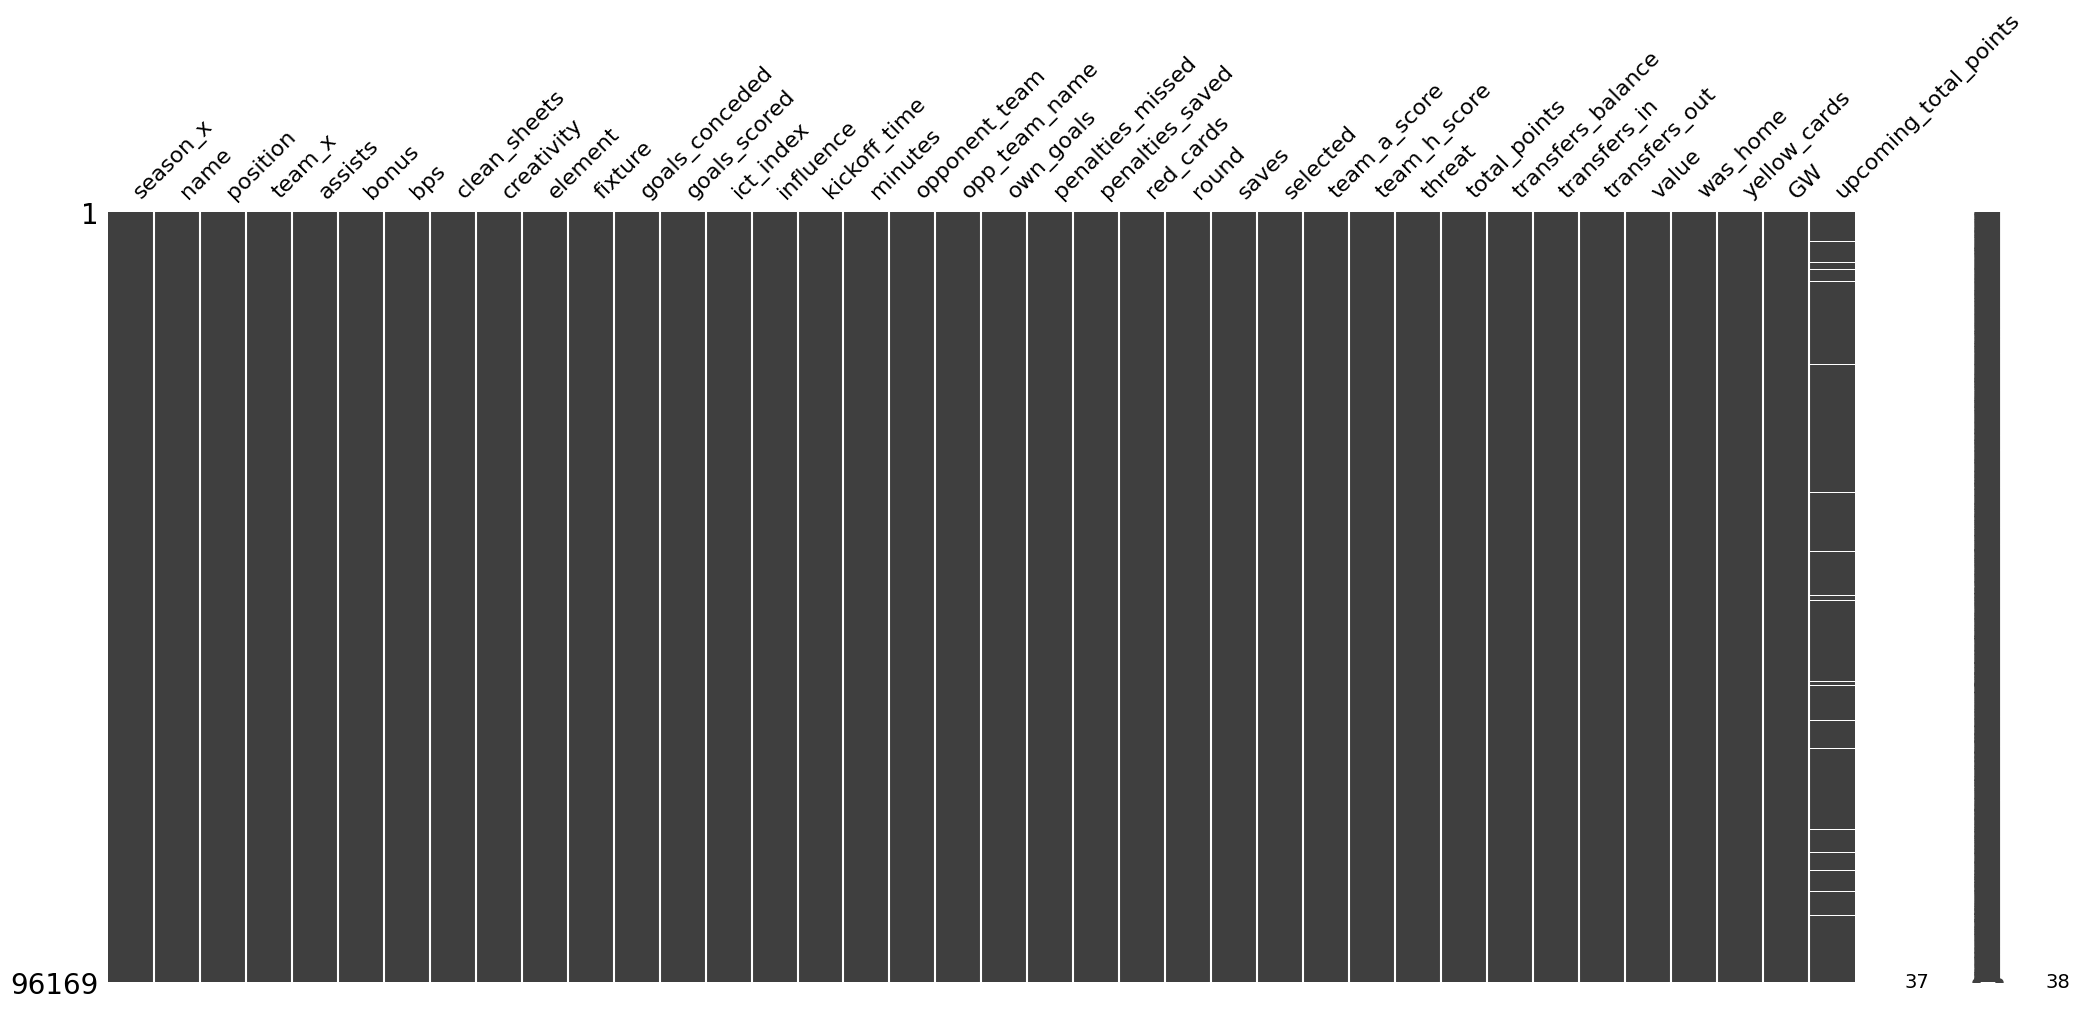

In [77]:
msno.matrix(df)

<Axes: >

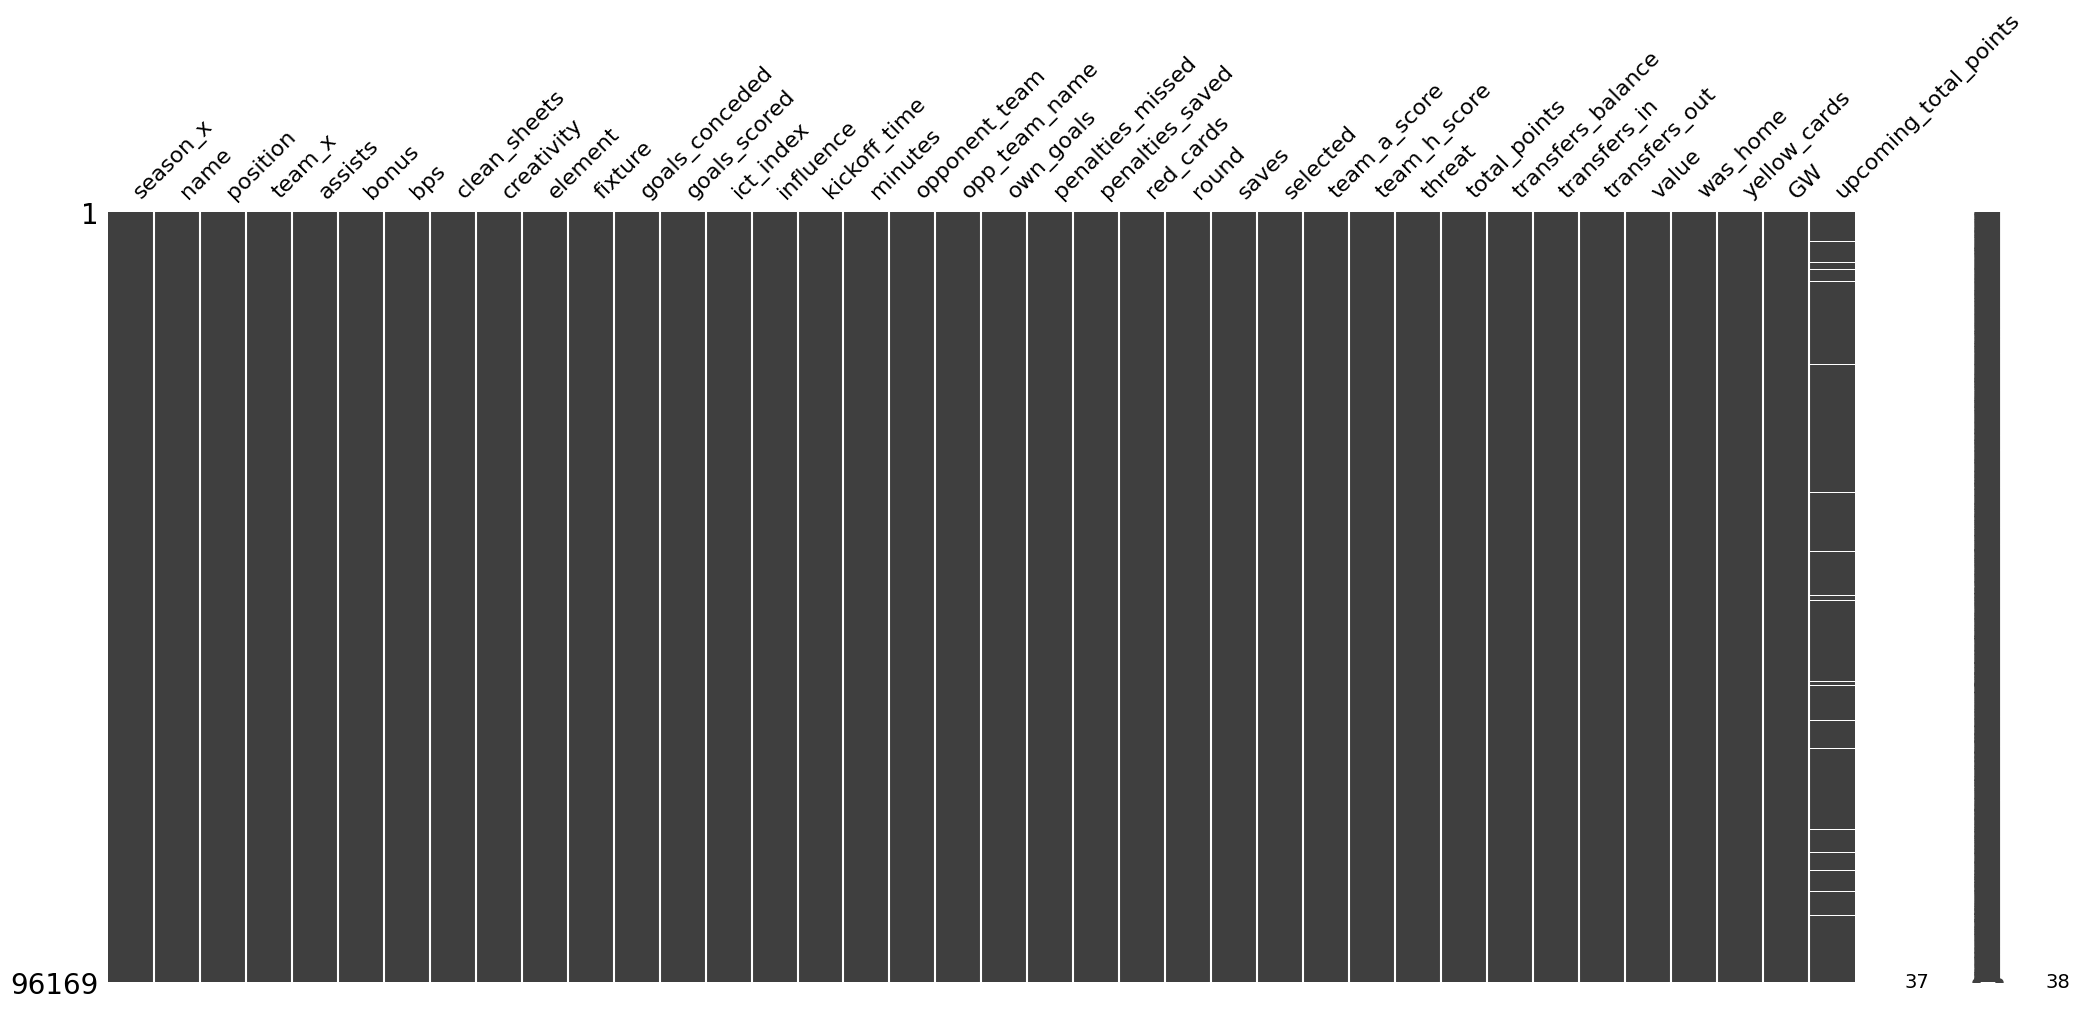

In [78]:
msno.matrix(df_copy)

In [79]:
df.head(10)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,upcoming_total_points
0,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1,0.0
1,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,20,0,0,0.0,0.0,2016-08-21T15:00:00Z,0,2,Bournemouth,0,0,0,0,2,0,11531,0.0,1.0,0.0,0,-3002,79,3081,55,True,0,2,0.0
2,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,29,0,0,0.0,0.0,2016-08-28T15:00:00Z,0,10,Man City,0,0,0,0,3,0,9587,1.0,3.0,0.0,0,-2053,28,2081,54,False,0,3,0.0
3,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,38,0,0,0.0,0.0,2016-09-10T14:00:00Z,0,18,Watford,0,0,0,0,4,0,8427,4.0,2.0,0.0,0,-1221,45,1266,54,True,0,4,0.0
4,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,46,0,0,0.0,0.0,2016-09-17T14:00:00Z,0,19,West Brom,0,0,0,0,5,0,7933,2.0,4.0,0.0,0,-520,29,549,54,False,0,5,0.0
5,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,59,0,0,0.0,0.0,2016-09-25T15:00:00Z,0,13,Southampton,0,0,0,0,6,0,7450,3.0,0.0,0.0,0,-500,20,520,54,True,0,6,0.0
6,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,70,0,0,0.0,0.0,2016-10-01T14:00:00Z,0,12,Middlesbrough,0,0,0,0,7,0,7199,1.0,1.0,0.0,0,-285,40,325,53,True,0,7,6.0
7,2016-17,Aaron Cresswell,DEF,West Ham,1,0,23,1,25.1,454,74,0,0,4.8,16.4,2016-10-15T16:30:00Z,74,5,Crystal Palace,0,0,0,1,8,0,7862,1.0,0.0,6.0,6,468,678,210,53,False,0,8,0.0
8,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,90,0,0,0.0,0.0,2016-10-22T14:00:00Z,0,15,Sunderland,0,0,0,0,9,0,9957,0.0,1.0,0.0,0,1813,2313,500,53,True,0,9,1.0
9,2016-17,Aaron Cresswell,DEF,West Ham,0,0,12,0,7.9,454,92,2,0,1.3,5.4,2016-10-30T13:30:00Z,90,6,Everton,0,0,0,0,10,0,12638,0.0,2.0,0.0,1,2432,2697,265,53,False,0,10,2.0


In [80]:
df_copy.head(10)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,upcoming_total_points
0,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1,0.0
1,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,20,0,0,0.0,0.0,2016-08-21T15:00:00Z,0,2,Bournemouth,0,0,0,0,2,0,11531,0.0,1.0,0.0,0,-3002,79,3081,55,True,0,2,0.0
2,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,29,0,0,0.0,0.0,2016-08-28T15:00:00Z,0,10,Man City,0,0,0,0,3,0,9587,1.0,3.0,0.0,0,-2053,28,2081,54,False,0,3,0.0
3,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,38,0,0,0.0,0.0,2016-09-10T14:00:00Z,0,18,Watford,0,0,0,0,4,0,8427,4.0,2.0,0.0,0,-1221,45,1266,54,True,0,4,0.0
4,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,46,0,0,0.0,0.0,2016-09-17T14:00:00Z,0,19,West Brom,0,0,0,0,5,0,7933,2.0,4.0,0.0,0,-520,29,549,54,False,0,5,0.0
5,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,59,0,0,0.0,0.0,2016-09-25T15:00:00Z,0,13,Southampton,0,0,0,0,6,0,7450,3.0,0.0,0.0,0,-500,20,520,54,True,0,6,0.0
6,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,70,0,0,0.0,0.0,2016-10-01T14:00:00Z,0,12,Middlesbrough,0,0,0,0,7,0,7199,1.0,1.0,0.0,0,-285,40,325,53,True,0,7,6.0
7,2016-17,Aaron Cresswell,DEF,West Ham,1,0,23,1,25.1,454,74,0,0,4.8,16.4,2016-10-15T16:30:00Z,74,5,Crystal Palace,0,0,0,1,8,0,7862,1.0,0.0,6.0,6,468,678,210,53,False,0,8,0.0
8,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,90,0,0,0.0,0.0,2016-10-22T14:00:00Z,0,15,Sunderland,0,0,0,0,9,0,9957,0.0,1.0,0.0,0,1813,2313,500,53,True,0,9,1.0
9,2016-17,Aaron Cresswell,DEF,West Ham,0,0,12,0,7.9,454,92,2,0,1.3,5.4,2016-10-30T13:30:00Z,90,6,Everton,0,0,0,0,10,0,12638,0.0,2.0,0.0,1,2432,2697,265,53,False,0,10,2.0


In [81]:
#this will make groups having :season, name, count of gameweeks under the name num_GWs

gw_counts = df_copy.groupby(['season_x', 'name'])['GW'].count().reset_index()
gw_counts.rename(columns={'GW': 'num_GWs'}, inplace=True)

#this will have the portion of the dataframe that doesn't have 38 entries represented by the number of GW != 38
incomplete_players = gw_counts[gw_counts['num_GWs'] != 38]

print(f"Number of players without 38 GWs: {len(incomplete_players)}")


if incomplete_players.empty:
    print("✅ All players have exactly 38 Gameweeks!")
else:
    print("⚠️ Some players are missing or have extra Gameweeks.")

#this will return the number of GW and number of entries next to it 
gw_counts['num_GWs'].value_counts().sort_index()

Number of players without 38 GWs: 674
⚠️ Some players are missing or have extra Gameweeks.


num_GWs
1       14
2        8
3        9
4        9
5       12
6        5
7        5
8        8
9        9
10       7
11       8
12       3
13      15
14      10
15      13
16      11
17      23
18      46
19      28
20      22
21      32
22      25
23      22
24      18
25      12
26      10
27      19
28       4
29      13
30      10
31      14
32      17
33      33
34      32
35      58
36      44
37      34
38    2108
39       7
40       1
42       1
55       1
76       2
Name: count, dtype: int64

In [82]:
#this will make groups having :season, name, count of gameweeks under the name num_GWs

gw_counts = df.groupby(['season_x', 'name'])['GW'].count().reset_index()
gw_counts.rename(columns={'GW': 'num_GWs'}, inplace=True)

#this will have the portion of the dataframe that doesn't have 38 entries represented by the number of GW != 38
incomplete_players = gw_counts[gw_counts['num_GWs'] != 38]

print(f"Number of players without 38 GWs: {len(incomplete_players)}")


if incomplete_players.empty:
    print("✅ All players have exactly 38 Gameweeks!")
else:
    print("⚠️ Some players are missing or have extra Gameweeks.")

#this will return the number of GW and number of entries next to it 
# gw_counts['num_GWs'].value_counts().sort_index()
# print(gw_counts['num_GWs']<38)
print(gw_counts[gw_counts['num_GWs']==1])

Number of players without 38 GWs: 674
⚠️ Some players are missing or have extra Gameweeks.
     season_x                     name  num_GWs
2     2016-17           Aaron Ramsdale        1
215   2016-17             Sam Surridge        1
334   2017-18            Dwight McNeil        1
802   2020-21          Hannibal Mejbri        1
1080  2020-21                Nile John        1
1194  2020-21         Sylvester Jasper        1
1216  2020-21           Tim Iroegbunam        1
1232  2020-21          Tyrese Francois        1
1251  2020-21             William Fish        1
1252  2020-21            William Osula        1
1384  2021-22           Charlie Savage        1
2499  2022-23           Mark Gillespie        1
2670  2022-23        Samuel Amo-Ameyaw        1
2770  2022-23  Yago de Santiago Alonso        1


**by now there is no logical errors in the last GW or the players**

In [83]:
nan_rows = df[df["upcoming_total_points"].isna()]

# print(nan_rows[["name", "season_x", "GW", "upcoming_total_points"]])
for idx, row in nan_rows.iterrows():
    if(row["GW"] != 38 ): 
        print(row[["name", "season_x", "GW", "upcoming_total_points"]])

In [84]:
# Find players who have 1 or 2 GWs
few_gw_players = gw_counts[gw_counts['num_GWs'].isin([1, 2])]
# print(few_gw_players)

# Loop through those players and print their entries from df
for _, row in few_gw_players.iterrows():
    player = row['name']
    season = row['season_x']
    print(row['name'],row['season_x'])
    
    # Filter df for that specific player and season
    player_rows = df[(df['name'] == player) & (df['season_x'] == season)]
    
    # Print their gameweeks and key info
    print(f"\nPlayer: {player} | Season: {season} | GWs Played: {row['num_GWs']}")
    print(player_rows[['GW', 'total_points', 'upcoming_total_points']].sort_values('GW'))

Aaron Ramsdale 2016-17

Player: Aaron Ramsdale | Season: 2016-17 | GWs Played: 1
    GW  total_points  upcoming_total_points
76  38             0                    NaN
Sam Surridge 2016-17

Player: Sam Surridge | Season: 2016-17 | GWs Played: 1
      GW  total_points  upcoming_total_points
7599  38             0                    NaN
Dwight McNeil 2017-18

Player: Dwight McNeil | Season: 2017-18 | GWs Played: 1
       GW  total_points  upcoming_total_points
11832  38             1                    NaN
Femi Seriki 2020-21

Player: Femi Seriki | Season: 2020-21 | GWs Played: 2
       GW  total_points  upcoming_total_points
27259  37             1                    0.0
27260  38             0                    NaN
Hannibal Mejbri 2020-21

Player: Hannibal Mejbri | Season: 2020-21 | GWs Played: 1
       GW  total_points  upcoming_total_points
28368  38             1                    NaN
Harry Boyes 2020-21

Player: Harry Boyes | Season: 2020-21 | GWs Played: 2
       GW  total_poin

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan


Player: William Osula | Season: 2020-21 | GWs Played: 1
       GW  total_points  upcoming_total_points
43610  38             0                    NaN
Charlie Savage 2021-22

Player: Charlie Savage | Season: 2021-22 | GWs Played: 1
       GW  total_points  upcoming_total_points
48210  38             0                    NaN
Dominic Ballard 2022-23

Player: Dominic Ballard | Season: 2022-23 | GWs Played: 2
       GW  total_points  upcoming_total_points
75888  37             1                    1.0
75889  38             1                    NaN
Kamari Doyle 2022-23

Player: Kamari Doyle | Season: 2022-23 | GWs Played: 2
       GW  total_points  upcoming_total_points
83262  37             1                    0.0
83263  38             0                    NaN
Mark Gillespie 2022-23

Player: Mark Gillespie | Season: 2022-23 | GWs Played: 1
       GW  total_points  upcoming_total_points
86705  38             0                    NaN
Mauro Bandeira 2022-23

Player: Mauro Bandeira | Season: 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

# **the above code snippet shows the entries for the players that have total GW in a season =1 or =2**

In [85]:
# For each player, find their last GW in that season
last_gw_per_player = df_copy.groupby(['season_x', 'name'])['GW'].max().reset_index()
last_gw_per_player.rename(columns={'GW': 'last_GW'}, inplace=True)

# Merge back to know which rows are a player's final GW
df_merged = df_copy.merge(last_gw_per_player, on=['season_x', 'name'], how='left')

# Now check: how many of the NaN rows in upcoming_total_points are at the player's last GW?
nan_rows = df_merged[df_merged['upcoming_total_points'].isna()]
correct_nans = nan_rows[nan_rows['GW'] == nan_rows['last_GW']]
incorrect_nans = nan_rows[nan_rows['GW'] != nan_rows['last_GW']]

print(f"✅ Logical NaN rows (last GW per player): {len(correct_nans)}")
print(f"⚠️ Unexpected NaN rows (not last GW): {len(incorrect_nans)}")

✅ Logical NaN rows (last GW per player): 2782
⚠️ Unexpected NaN rows (not last GW): 0


In [86]:
# --- Step 1: Find players with more than 38 entries ---
players_over_38 = gw_counts[gw_counts['num_GWs'] > 38]

# --- Step 2: For one of them, inspect their teams ---
# (Pick one player who has >38 entries and see if they changed teams)
example_player = players_over_38.iloc[0]
season = example_player['season_x']
name = example_player['name']

# print(f"Inspecting {name} in season {season}...")
# display(df_copy[(df_copy['season_x'] == season) & (df_copy['name'] == name)][['GW', 'team_x']].sort_values('GW'))


In [87]:
# display(df_copy[(df_copy['season_x'] == season) & (df_copy['name'] == name)][['name','season_x','GW', 'team_x']].sort_values('GW'))
# df_copy[(df_copy['season_x'] == season) & (df_copy['name'] == name)].count()

In [88]:
# --- Step 1: Make sure the dataframe is sorted correctly ---
# Sorting ensures that the rolling window operates in correct GW order.
df = df.sort_values(by=['season_x', 'name', 'GW']).reset_index(drop=True)

# --- Step 2: Compute "form" for each player (per season) ---
# We group by season and player name to isolate each player’s timeline.
# Then we apply a rolling window (size=4) on total_points.
# 'min_periods=1' ensures we still get a value for GWs < 4 (uses fewer GWs).
df['form'] = (
    df
    .groupby(['season_x', 'name'])['total_points']
    .rolling(window=4, min_periods=1)
    .mean()
    .reset_index(level=[0,1], drop=True)  # drop the multi-index created by rolling
    / 10.0  # divide by 10 as per the project definition
)

# --- Step 3: Verify the result ---
print(df[['season_x', 'name', 'GW', 'total_points', 'form']].head(15))

   season_x             name  GW  total_points   form
0   2016-17  Aaron Cresswell   1             0  0.000
1   2016-17  Aaron Cresswell   2             0  0.000
2   2016-17  Aaron Cresswell   3             0  0.000
3   2016-17  Aaron Cresswell   4             0  0.000
4   2016-17  Aaron Cresswell   5             0  0.000
5   2016-17  Aaron Cresswell   6             0  0.000
6   2016-17  Aaron Cresswell   7             0  0.000
7   2016-17  Aaron Cresswell   8             6  0.150
8   2016-17  Aaron Cresswell   9             0  0.150
9   2016-17  Aaron Cresswell  10             1  0.175
10  2016-17  Aaron Cresswell  11             2  0.225
11  2016-17  Aaron Cresswell  12             1  0.100
12  2016-17  Aaron Cresswell  13             1  0.125
13  2016-17  Aaron Cresswell  14             0  0.100
14  2016-17  Aaron Cresswell  15             1  0.075


In [89]:
df['position'] = df['position'].replace({'GKP': 'GK'})

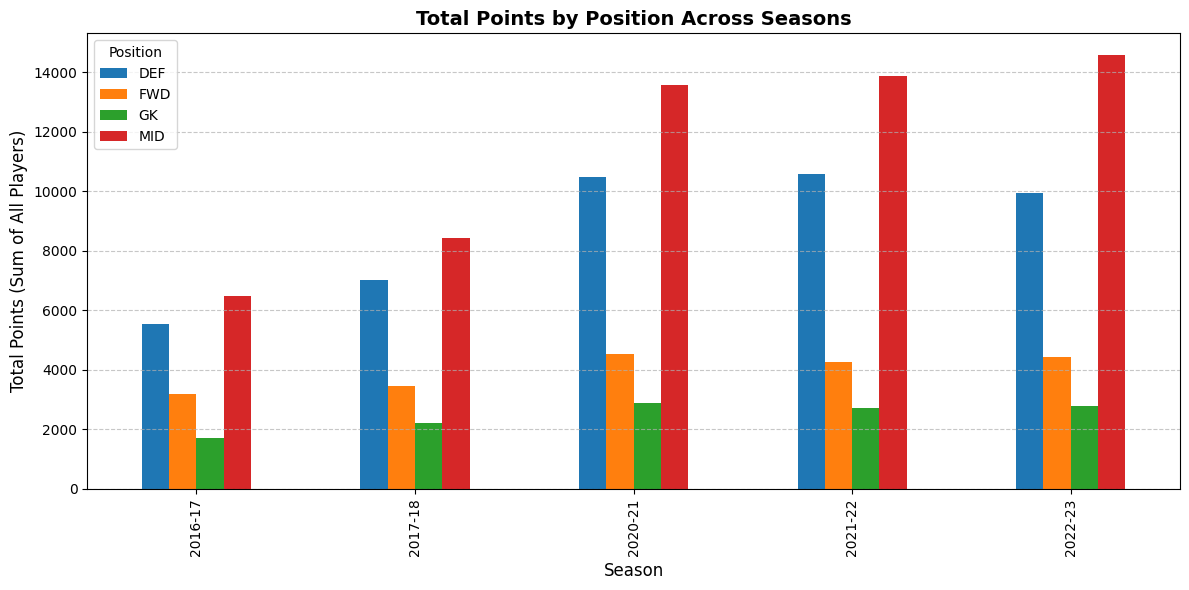

,season_x,position,total_points_sum
3,2016-17,MID,6493
0,2016-17,DEF,5536
1,2016-17,FWD,3180
2,2016-17,GK,1720
7,2017-18,MID,8428
4,2017-18,DEF,7018
5,2017-18,FWD,3462
6,2017-18,GK,2220
11,2020-21,MID,13577
8,2020-21,DEF,10461


In [90]:
# --- Step 1: Ensure ordering for consistent processing ---
df = df.sort_values(by=['season_x', 'position', 'GW']).reset_index(drop=True)

# --- Step 2: Group directly by season and position ---
# We sum total_points across *all players* in that position within the same season.
# This shows which position, collectively, contributed the most points that year.
position_season_totals = (
    df
    .groupby(['season_x', 'position'], as_index=False)['total_points']
    .sum()
    .rename(columns={'total_points': 'total_points_sum'})
)

# --- Step 3: Visualization ---
# Create a grouped bar chart showing total points per position per season.
pivot_table = position_season_totals.pivot(index='season_x', columns='position', values='total_points_sum')

pivot_table.plot(kind='bar', figsize=(12, 6))

# --- Step 4: Styling and labeling ---
plt.title('Total Points by Position Across Seasons', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Points (Sum of All Players)', fontsize=12)
plt.legend(title='Position')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- Step 5: Display chart ---
plt.show()

# --- Step 6: Optional summary printout ---
display(position_season_totals.sort_values(['season_x', 'total_points_sum'], ascending=[True, False]).head(10))

In [91]:
# df.groupby(['position','season_x'])['GW'==10].count()
df.groupby(['position', 'season_x'])['name'].nunique()


position  season_x
DEF       2016-17      86
          2017-18     114
          2020-21     245
          2021-22     246
          2022-23     261
FWD       2016-17      41
          2017-18      46
          2020-21      92
          2021-22      98
          2022-23      93
GK        2016-17      27
          2017-18      36
          2020-21      80
          2021-22      83
          2022-23      85
MID       2016-17      89
          2017-18     119
          2020-21     295
          2021-22     309
          2022-23     338
Name: name, dtype: int64

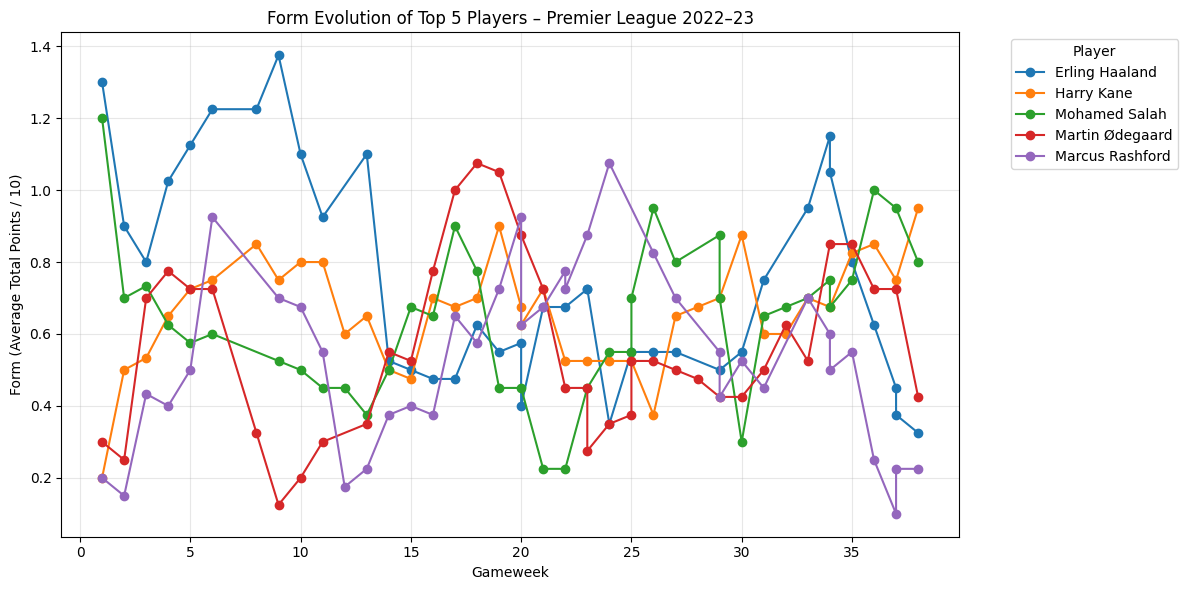

In [92]:
# --- Step 1: Filter for the 2022–23 season ---
season_df = df[df['season_x'] == '2022-23'].copy()

# --- Step 2: Compute total points per player across that season ---
top5_players = (
    season_df.groupby('name')['total_points']
    .sum()                          # sum of total_points for the season
    .nlargest(5)                    # pick top 5 players
    .index                          # keep only their names
)

# --- Step 3: Filter the data to those players only ---
top5_df = season_df[season_df['name'].isin(top5_players)]

# --- Step 4: Sort by Gameweek for a clean plot ---
top5_df = top5_df.sort_values(['name', 'GW'])

# --- Step 5: Plot their Form Trend ---
plt.figure(figsize=(12, 6))

for player in top5_players:
    player_data = top5_df[top5_df['name'] == player]
    plt.plot(player_data['GW'], player_data['form'], marker='o', label=player)

plt.title("Form Evolution of Top 5 Players – Premier League 2022–23")
plt.xlabel("Gameweek")
plt.ylabel("Form (Average Total Points / 10)")
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Axes: >

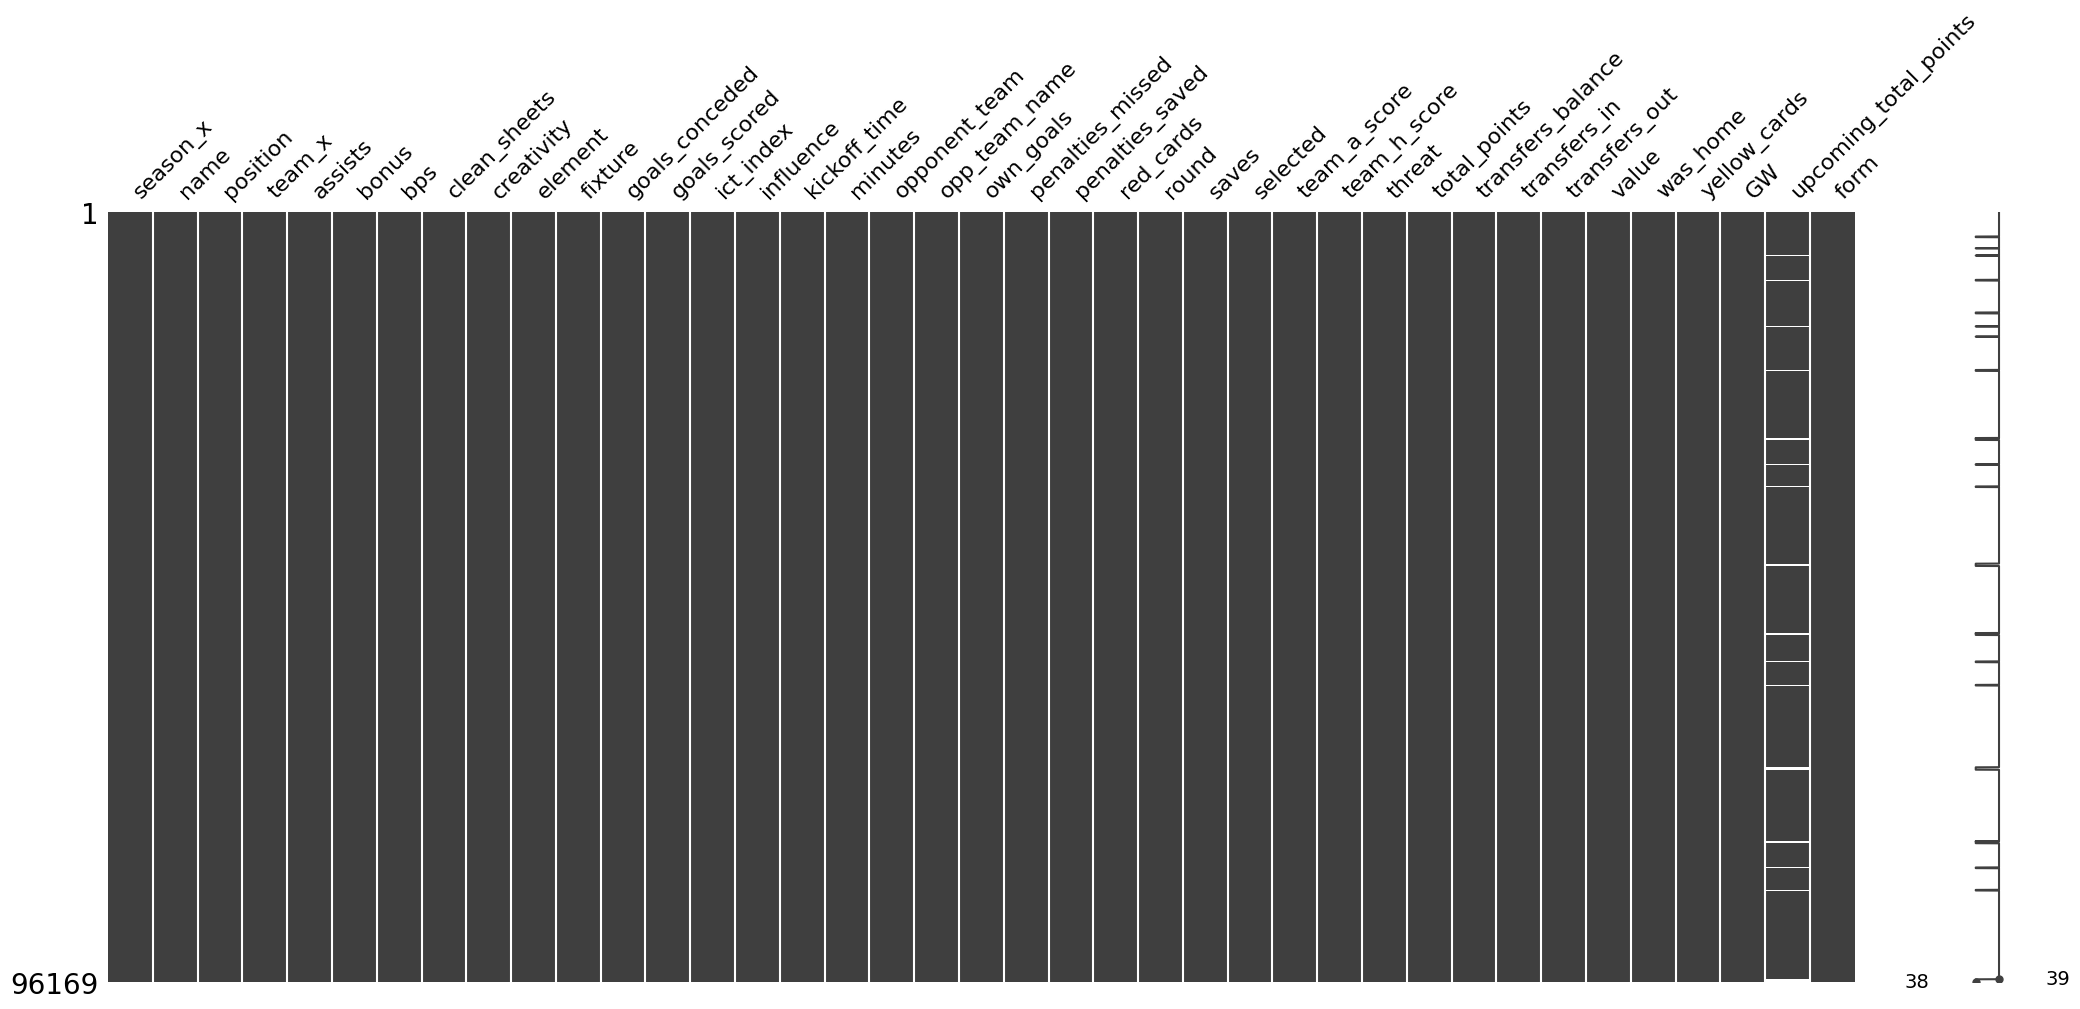

In [93]:
msno.matrix(df)

In [94]:
df[df['upcoming_total_points'].isna()].count()

season_x                 2782
name                     2782
position                 2782
team_x                   2782
assists                  2782
bonus                    2782
bps                      2782
clean_sheets             2782
creativity               2782
element                  2782
fixture                  2782
goals_conceded           2782
goals_scored             2782
ict_index                2782
influence                2782
kickoff_time             2782
minutes                  2782
opponent_team            2782
opp_team_name            2782
own_goals                2782
penalties_missed         2782
penalties_saved          2782
red_cards                2782
round                    2782
saves                    2782
selected                 2782
team_a_score             2782
team_h_score             2782
threat                   2782
total_points             2782
transfers_balance        2782
transfers_in             2782
transfers_out            2782
value     

In [ ]:
df = df[~((df['GW'] == 38) & (df['upcoming_total_points'].isna()))]


In [ ]:
df[df['upcoming_total_points'].isna()].count()

In [ ]:
df.info()

In [ ]:
msno.matrix(df)

In [ ]:
groups=df.groupby('position')
print(groups.size())
# print(list(groups.groups.keys()))

In [ ]:
# 1️⃣ Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ================================================
# 2️⃣ Split the dataset into GK and non-GK subsets
# ================================================
gk_df = df[df['position'].str.upper().isin(['GK', 'GKP'])].copy()
non_gk_df = df[~df['position'].str.upper().isin(['GK', 'GKP'])].copy()

# Remove rows with NaN in target (you said those are all GW 38)
# gk_df = gk_df.dropna(subset=['upcoming_total_points'])
# non_gk_df = non_gk_df.dropna(subset=['upcoming_total_points'])

print(f"Non-GK entries: {len(non_gk_df)}, GK entries: {len(gk_df)}")

In [ ]:
# ================================================
# 3️⃣ Define feature sets for each model
# ================================================

# 🧩 Match-related features for non-GK model
non_gk_match_features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'bps', 'total_points',
    'team_a_score', 'team_h_score', 'was_home'
]

# 👤 Player-related features for non-GK model
non_gk_player_features = [
    'position', 'value', 'influence', 'creativity', 'threat', 'ict_index',
    'form', 'selected', 'transfers_in', 'transfers_out', 'transfers_balance'
]

# ✅ Combine them for the full FFNN model
non_gk_features = non_gk_match_features + non_gk_player_features

# 🧩 Match-related features for GK model
gk_match_features = [
    'minutes', 'clean_sheets', 'goals_conceded', 'saves',
    'penalties_saved', 'own_goals', 'yellow_cards', 'red_cards',
    'bonus', 'bps', 'total_points', 'team_a_score', 'team_h_score', 'was_home'
]

# 👤 Player-related features for GK model
gk_player_features = [
    'value', 'influence', 'ict_index', 'form', 'selected',
    'transfers_in', 'transfers_out', 'transfers_balance'
]

# ✅ Combine them for the RandomForest model
gk_features = gk_match_features + gk_player_features

target = 'upcoming_total_points'


In [ ]:
# ================================================
# 4️⃣ Prepare data splits
# ================================================
# Option A: Random 80/20 split (you can change to time-based if needed)
non_gk_X_train, non_gk_X_test, non_gk_y_train, non_gk_y_test = train_test_split(
    non_gk_df[non_gk_features], non_gk_df[target], test_size=0.2, random_state=42
)
gk_X_train, gk_X_test, gk_y_train, gk_y_test = train_test_split(
    gk_df[gk_features], gk_df[target], test_size=0.2, random_state=42
)

In [ ]:
# ================================================
# 5️⃣ Preprocessing
# ================================================
# Separate categorical and numeric columns
non_gk_categorical = ['position', 'was_home']
non_gk_numeric = [col for col in non_gk_features if col not in non_gk_categorical]

gk_categorical = ['was_home']
gk_numeric = [col for col in gk_features if col not in gk_categorical]

# Pipelines
non_gk_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), non_gk_numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore'), non_gk_categorical)
])

gk_preprocessor = ColumnTransformer([
    ('num', 'passthrough', gk_numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore'), gk_categorical)
])

In [ ]:
# ================================================
# 6️⃣ FFNN model for Non-GK players
# ================================================

# Build the FFNN model
def build_ffnn(input_dim):
    model = Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(1, activation='linear')  # Regression output
    ])
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    return model

# Preprocess features
non_gk_X_train_scaled = non_gk_preprocessor.fit_transform(non_gk_X_train)
non_gk_X_test_scaled = non_gk_preprocessor.transform(non_gk_X_test)

# Build and train FFNN
ffnn_model = build_ffnn(non_gk_X_train_scaled.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_ffnn = ffnn_model.fit(
    non_gk_X_train_scaled, non_gk_y_train,
    validation_data=(non_gk_X_test_scaled, non_gk_y_test),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


In [ ]:
# # Evaluate FFNN
# non_gk_preds = ffnn_model.predict(non_gk_X_test_scaled)
# print("\n🧠 FFNN Non-GK Model Performance:")
# print(f"MAE: {mean_absolute_error(non_gk_y_test, non_gk_preds):.4f}")
# print(f"RMSE: {mean_squared_error(non_gk_y_test, non_gk_preds, squared=False):.4f}")
# print(f"R²: {r2_score(non_gk_y_test, non_gk_preds):.4f}")

# Evaluate FFNN
non_gk_preds = ffnn_model.predict(non_gk_X_test_scaled).flatten()  # flatten() ensures correct shape

# Compute metrics
mae_ffnn = mean_absolute_error(non_gk_y_test, non_gk_preds)
mse_ffnn = mean_squared_error(non_gk_y_test, non_gk_preds)
rmse_ffnn = mean_squared_error(non_gk_y_test, non_gk_preds, squared=False)
r2_ffnn = r2_score(non_gk_y_test, non_gk_preds)

# Print results
print("\n🧠 FFNN Non-GK Model Performance:")
print(f"MAE: {mae_ffnn:.4f}")
print(f"MSE: {mse_ffnn:.4f}")
print(f"RMSE: {rmse_ffnn:.4f}")
print(f"R²: {r2_ffnn:.4f}")


In [ ]:
# ================================================
# 7️⃣ RandomForest model for GK players
# ================================================
gk_model = Pipeline([
    ('preprocessor', gk_preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=150,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

gk_model.fit(gk_X_train, gk_y_train)
gk_preds = gk_model.predict(gk_X_test)

# print("\n🧤 RandomForest GK Model Performance:")
# print(f"MAE: {mean_absolute_error(gk_y_test, gk_preds):.4f}")
# print(f"RMSE: {mean_squared_error(gk_y_test, gk_preds, squared=False):.4f}")
# print(f"R²: {r2_score(gk_y_test, gk_preds):.4f}")


# Compute metrics
mae_gk = mean_absolute_error(gk_y_test, gk_preds)
mse_gk = mean_squared_error(gk_y_test, gk_preds)
rmse_gk = mean_squared_error(gk_y_test, gk_preds, squared=False)
r2_gk = r2_score(gk_y_test, gk_preds)

# Print results
print("\n🧤 RandomForest GK Model Performance:")
print(f"MAE: {mae_gk:.4f}")
print(f"MSE: {mse_gk:.4f}")
print(f"RMSE: {rmse_gk:.4f}")
print(f"R²: {r2_gk:.4f}")


In [ ]:
# ================================================
# 8️⃣ Optional: visualize FFNN training
# ================================================
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history_ffnn.history['mae'], label='Train MAE')
plt.plot(history_ffnn.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('FFNN Non-GK Model Training')
plt.legend()
plt.show()

In [117]:
import shap
import numpy as np

# Small background sample to make SHAP faster (since FFNNs can be large)
# background = shap.sample(non_gk_X_train_scaled, 100, random_state=42)

# Create explainer (SHAP will automatically choose DeepExplainer or GradientExplainer)
# explainer_ffnn = shap.Explainer(ffnn_model, background)

# Compute SHAP values for test data
# shap_values_ffnn = explainer_ffnn(non_gk_X_test_scaled)

# Use only 50 background samples and 300 test samples
background = shap.sample(non_gk_X_train_scaled, 100, random_state=42)
test_sample = shap.sample(non_gk_X_test_scaled, 300, random_state=42)

explainer_ffnn = shap.Explainer(ffnn_model, background, algorithm="auto")
shap_values_ffnn = explainer_ffnn.shap_values(test_sample)

PermutationExplainer explainer: 301it [00:22,  7.44it/s]                         


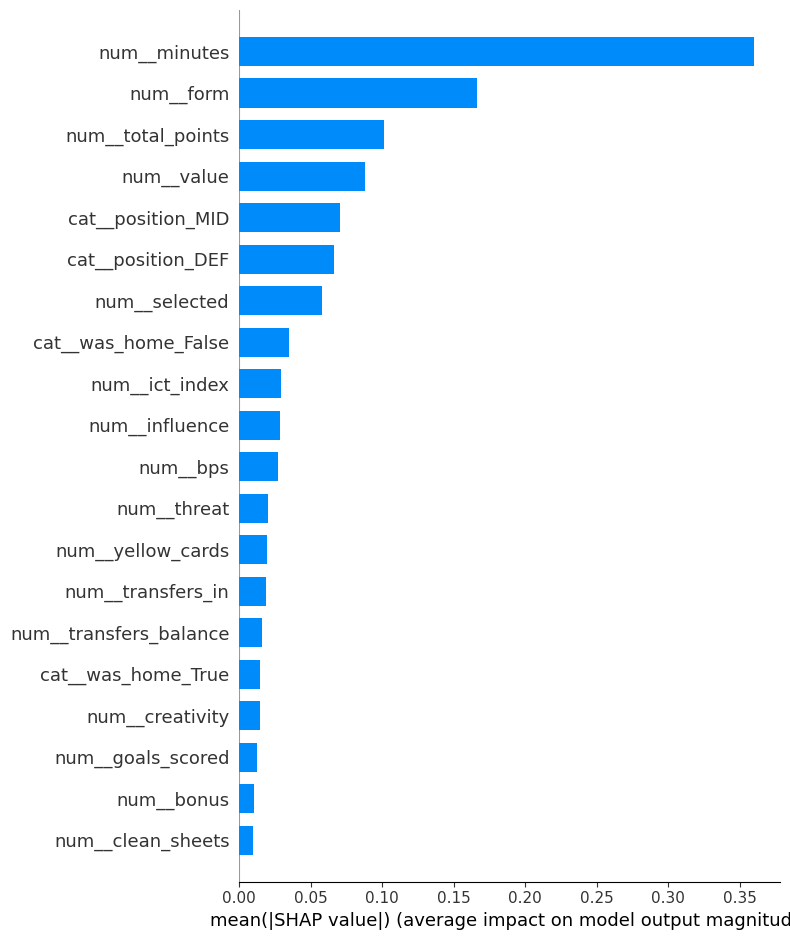

In [118]:
# Summary bar plot (global importance)
# shap.summary_plot(
#     shap_values_ffnn,
#     non_gk_X_test_scaled,
#     feature_names=non_gk_X_test.columns,
#     plot_type='bar'
# )

#the following try statement is there because due to there was columns encoded as their datatype was different than int and float 
#the preprocessors and onehotencoder result in increasing the number of the columns for the distinct values
# Get feature names after preprocessing
try:
    feature_names = non_gk_preprocessor.get_feature_names_out(non_gk_X_test.columns)
except:
    # Fallback in case of version differences
    feature_names = [f"feature_{i}" for i in range(non_gk_X_test_scaled.shape[1])]

# Now plot again using correct feature names
shap.summary_plot(
    shap_values_ffnn,
    non_gk_X_test_scaled,
    feature_names=feature_names,
    plot_type='bar'
)

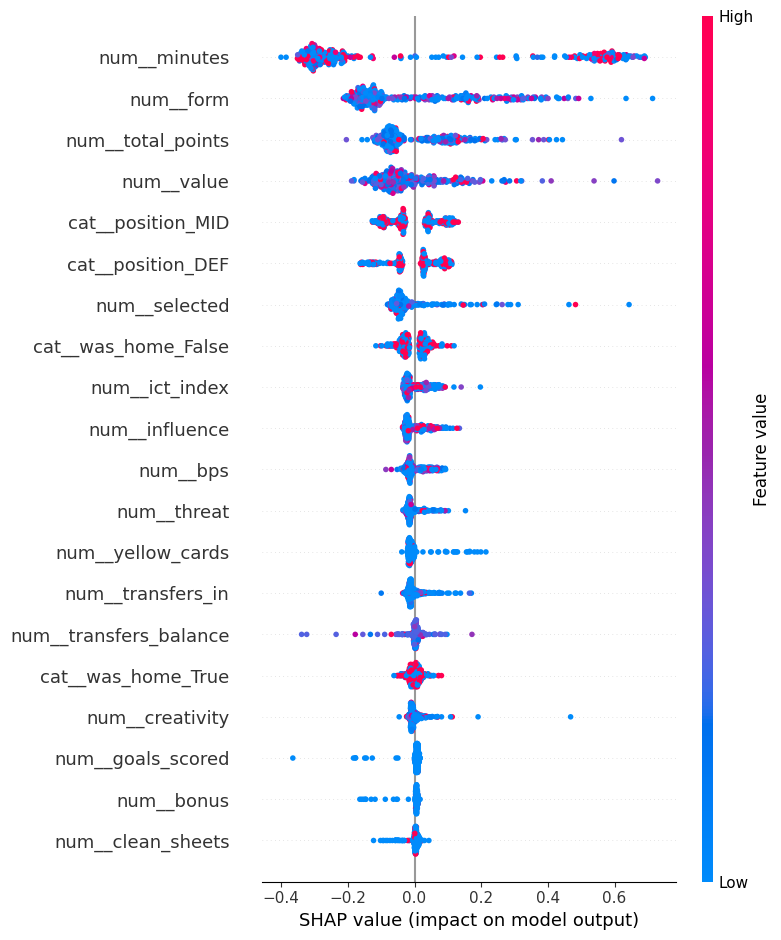

In [119]:
# Detailed SHAP summary (each dot = one player-game prediction)
shap.summary_plot(
    shap_values_ffnn,
    non_gk_X_test_scaled[:300],
    feature_names=feature_names
)

In [127]:
i = 3  # example index
#manually calculated base_vale for the local graph
base_value = np.mean(ffnn_model.predict(background))
#we had to compute the base value manually because the auto detector for the explainer chose the permutation explainer that 
#treat the model as blackbox and doesn't have access to the gradients and network graph

shap.initjs()
shap.plots.force(
    base_value,
    shap_values_ffnn[i],
    features=feature_names
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


# 🧤 Part 2 — SHAP for RandomForest (GK Players)


In [129]:
# Create SHAP TreeExplainer
explainer_rf = shap.TreeExplainer(gk_model.named_steps['regressor'])

# Compute SHAP values (using the preprocessed test data)
X_gk_test_prepared = gk_model.named_steps['preprocessor'].transform(gk_X_test)
shap_values_rf = explainer_rf(X_gk_test_prepared)

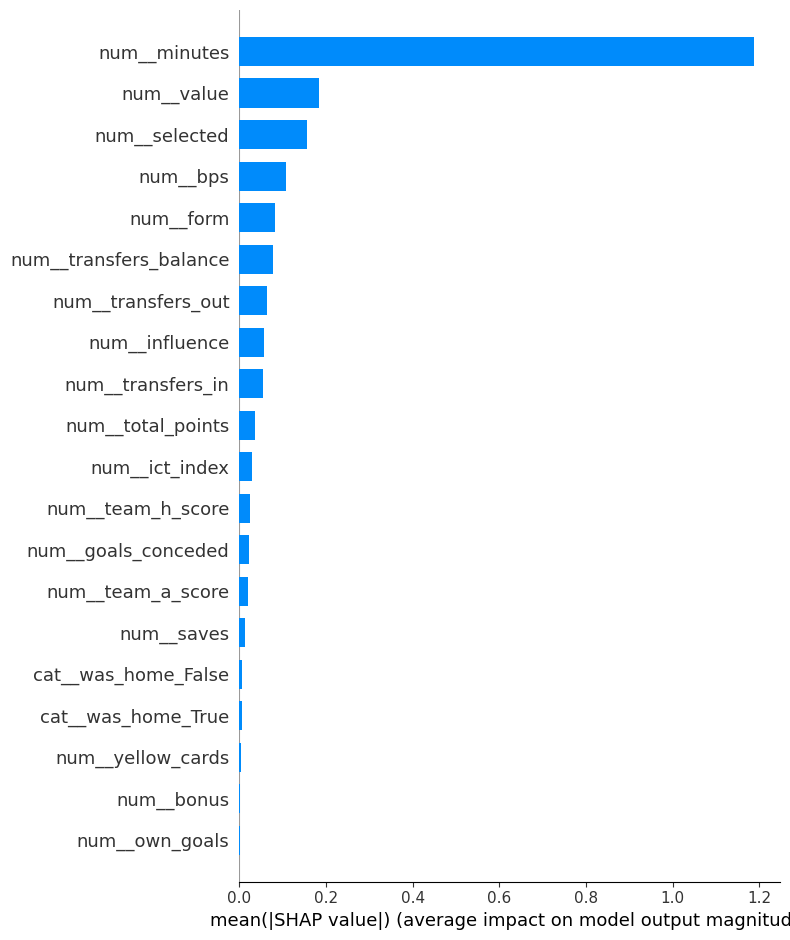

In [131]:
try:
    # Get the correct expanded feature names from the preprocessor
    feature_names2 = gk_model.named_steps['preprocessor'].get_feature_names_out(gk_X_test.columns)
except:
    # Fallback if the preprocessor doesn’t support get_feature_names_out()
    feature_names2 = [f"feature_{i}" for i in range(X_gk_test_prepared.shape[1])]

# SHAP summary plot
shap.summary_plot(
    shap_values_rf,
    X_gk_test_prepared,
    feature_names=feature_names2,
    plot_type='bar'
)

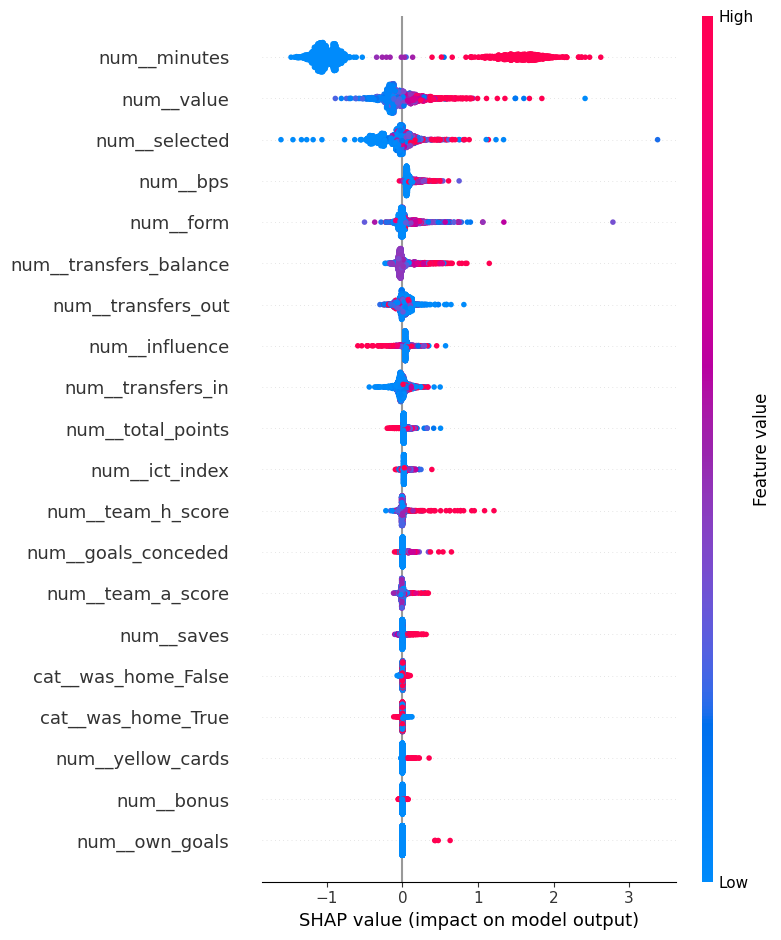

In [133]:
shap.summary_plot(
    shap_values_rf,
    X_gk_test_prepared,
    feature_names=feature_names2
)

In [135]:
i = 3  # example goalkeeper

# Wrap values into a proper SHAP Explanation object
#this explainer object is essentioal in the visulaization line because it needs explainer object so we extract the neeeded data
#and form the explainer ourselves
shap_exp = shap.Explanation(
    values=shap_values_rf[i],
    base_values=explainer_rf.expected_value,
    data=X_gk_test_prepared[i],
    feature_names=feature_names2
)

# Then visualize
shap.plots.force(shap_exp)